In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_AvUGla7hGrZncqNQQCL8FEz1uns-v3iB9N-toAmNbBr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityeligibilitypredictor-donotdelete-pr-bsosqjtiz0zisu'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Analyze the Data

In [3]:
df.drop(['Serial No.'],axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
df.shape

(400, 8)

In [8]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [10]:
df.mean()

GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

In [11]:
df.median()

GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
dtype: float64

In [12]:
df.mode()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,312,110.0,3.0,3.5,3.0,8.0,1.0,0.64
1,324,NaN,NaN,4.0,NaN,NaN,NaN,NaN


# Handling missing values

In [13]:
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [14]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Data Visualization

## Univariate Analysis

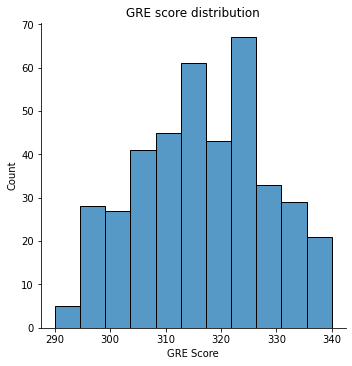

In [15]:
sns.displot(x=df["GRE Score"])
plt.title("GRE score distribution");

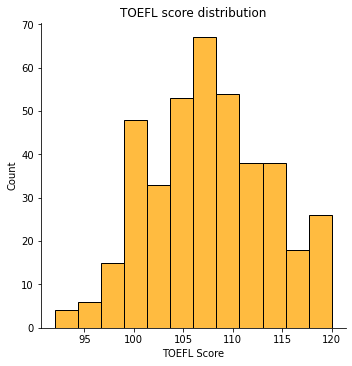

In [16]:
sns.displot(x=df["TOEFL Score"], color='orange')
plt.title("TOEFL score distribution");

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

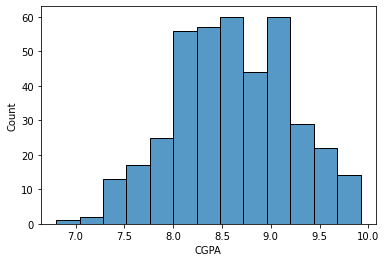

In [17]:
sns.histplot(x=df.CGPA) 

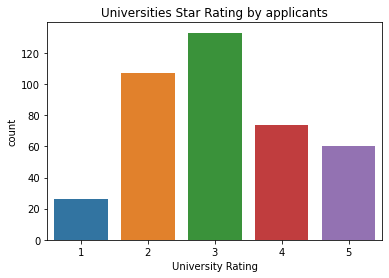

In [18]:
sns.countplot(x=df["University Rating"]);
plt.title("Universities Star Rating by applicants");

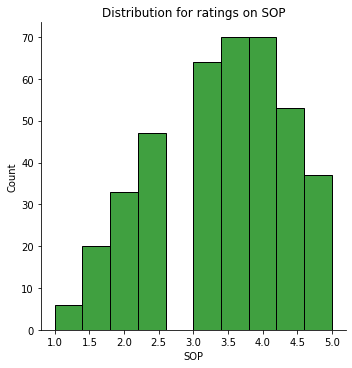

In [19]:
sns.displot(x=df["SOP"], color='green');
plt.title("Distribution for ratings on SOP");

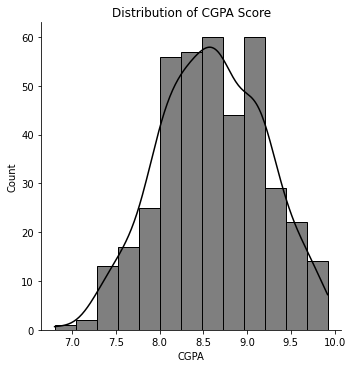

In [20]:
sns.displot(x=df["CGPA"], kde=True, color='black');
plt.title("Distribution of CGPA Score");

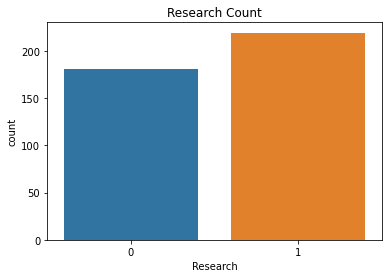

In [21]:
sns.countplot(x=df["Research"]);
plt.title("Research Count");

## Bivariate Analysis

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

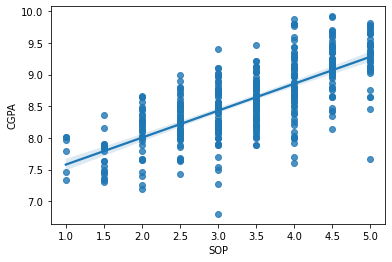

In [22]:
sns.regplot(x='SOP', y='CGPA', data=df)

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

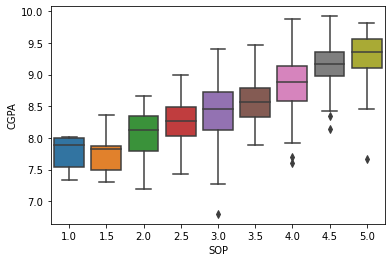

In [23]:
sns.boxplot(x='SOP',y='CGPA',data=df)

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

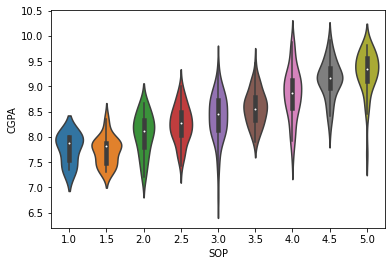

In [24]:
sns.violinplot(x='SOP',y='CGPA',data=df)

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

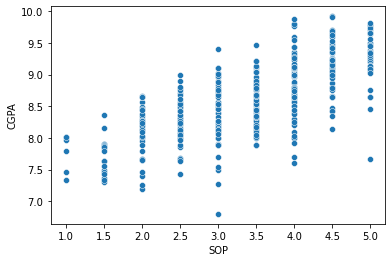

In [25]:
sns.scatterplot(x='SOP', y='CGPA', data=df)

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

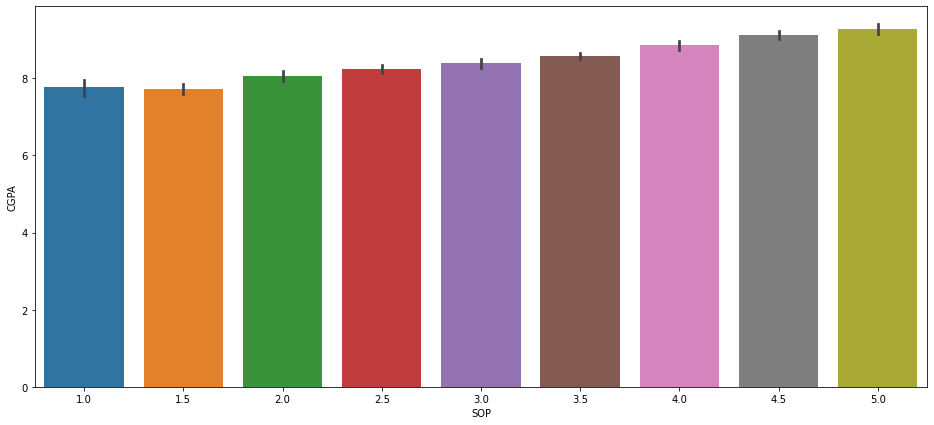

In [26]:
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x=df.SOP,y=df.CGPA,ax=ax)

## Multi-Variate Analysis

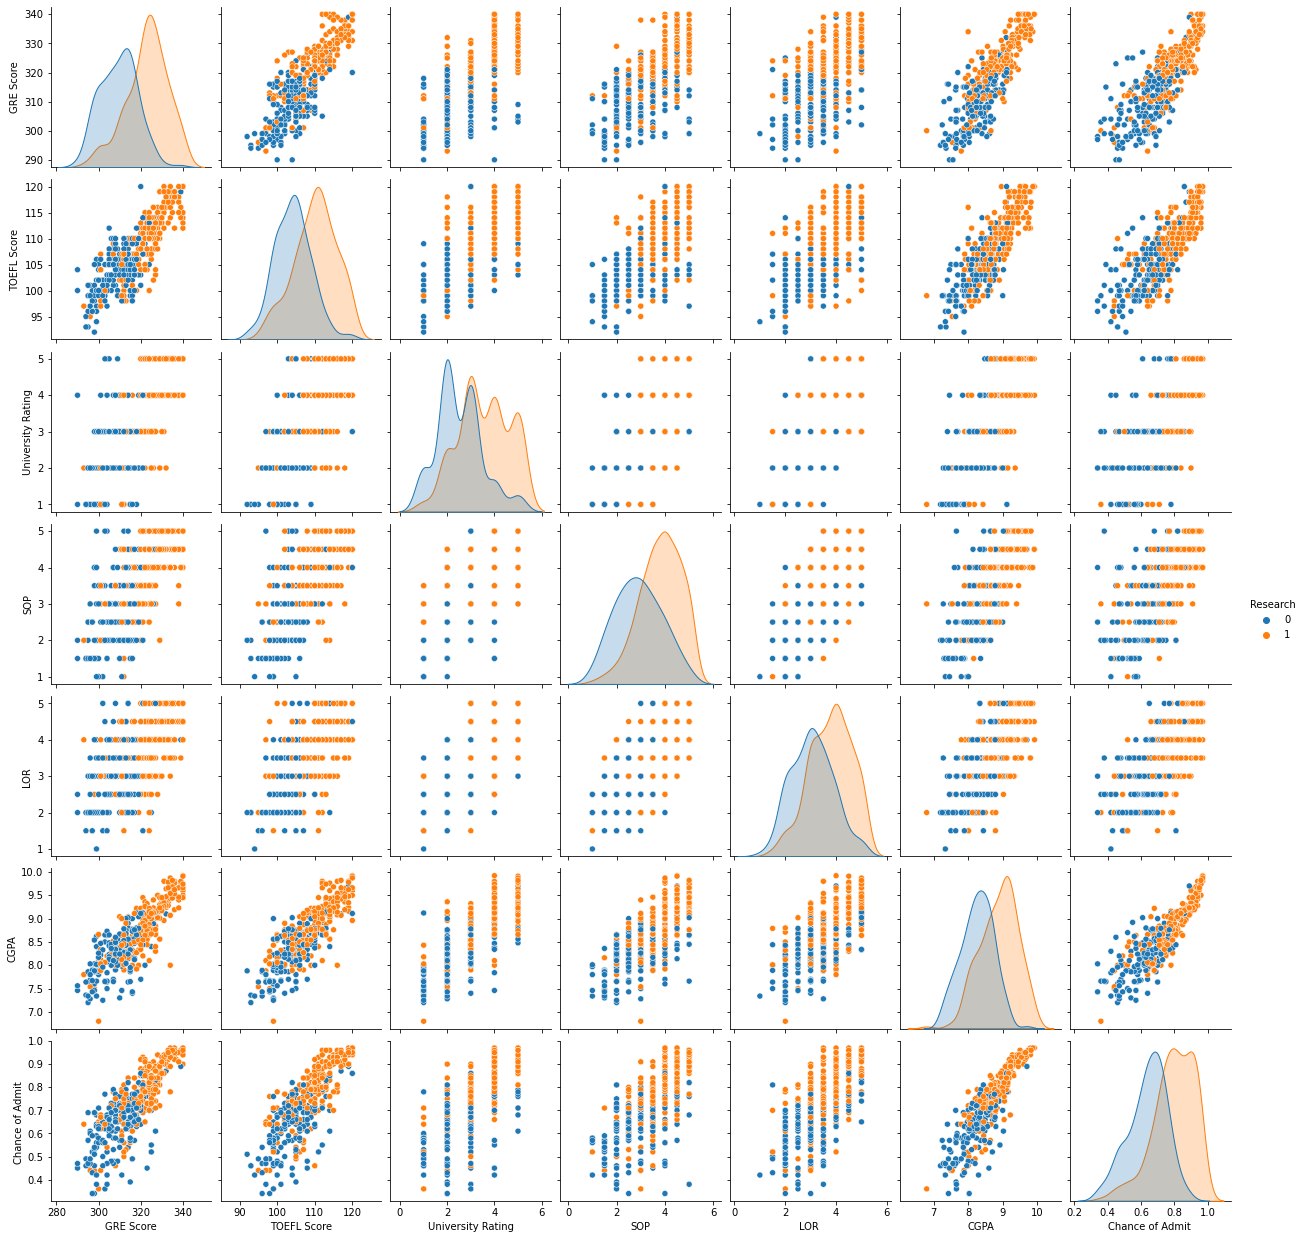

In [27]:
sns.pairplot(df,hue='Research')

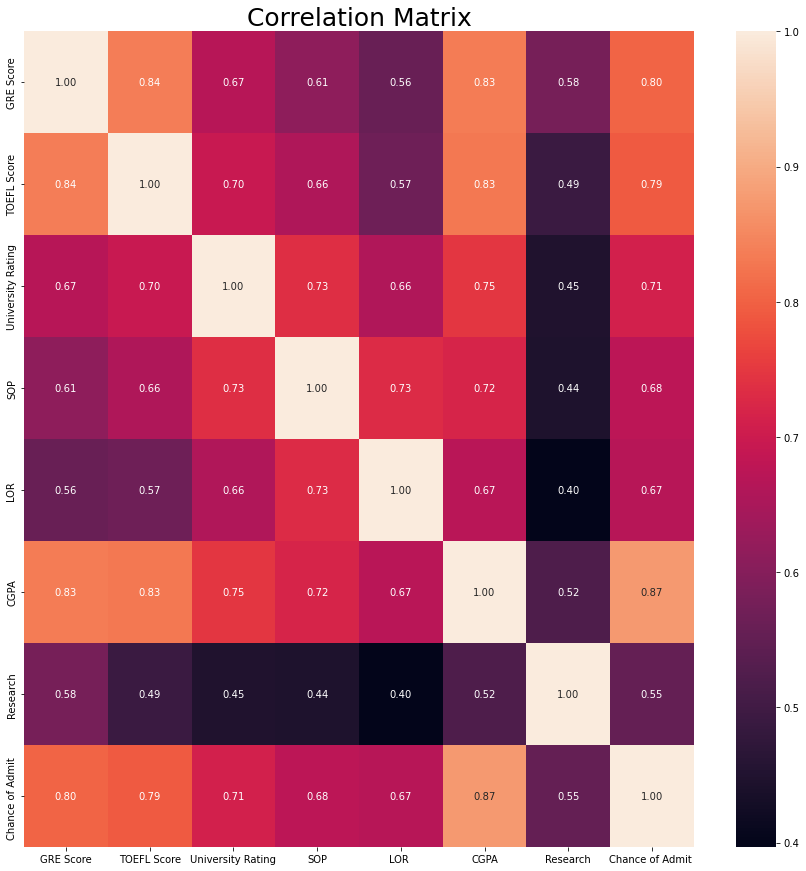

In [28]:
corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 25)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

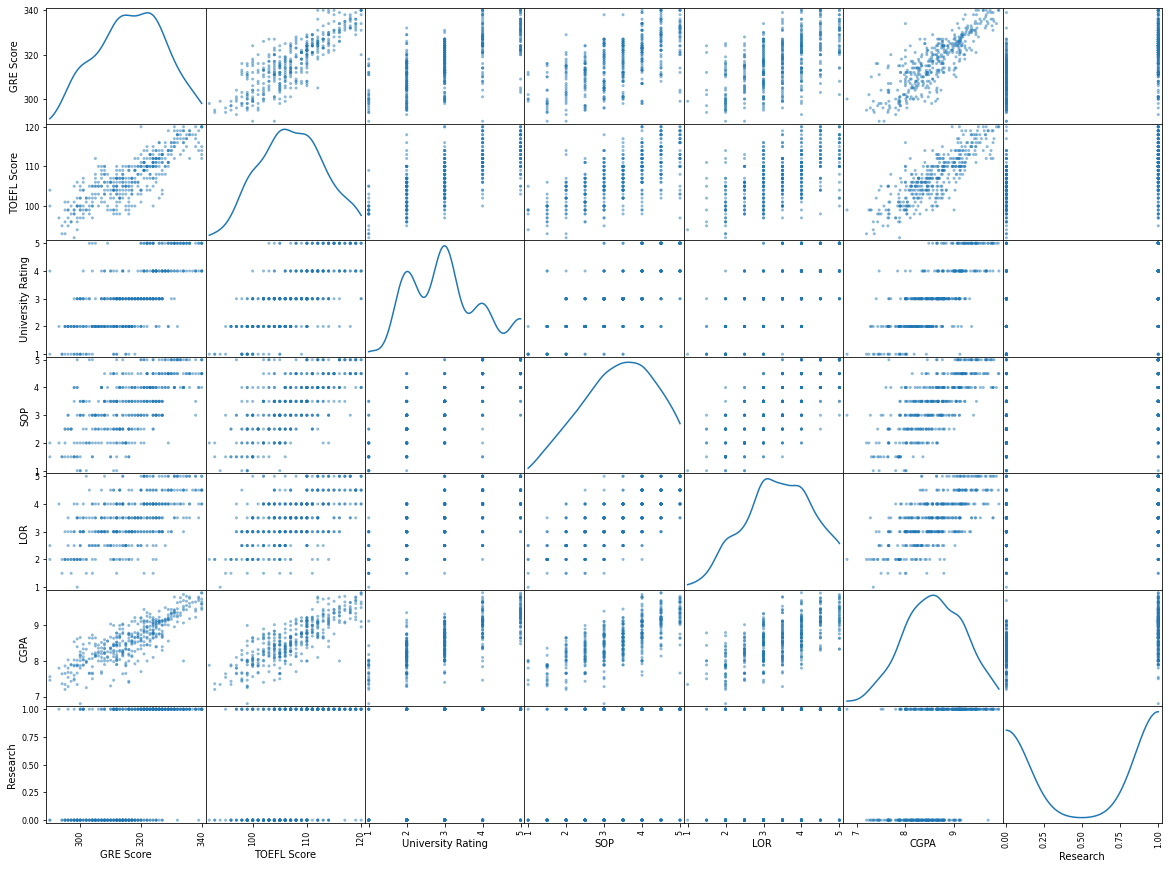

In [29]:
pd.plotting.scatter_matrix(df.loc[:,"GRE Score":"Research"],diagonal="kde",figsize=(20,15))
plt.show

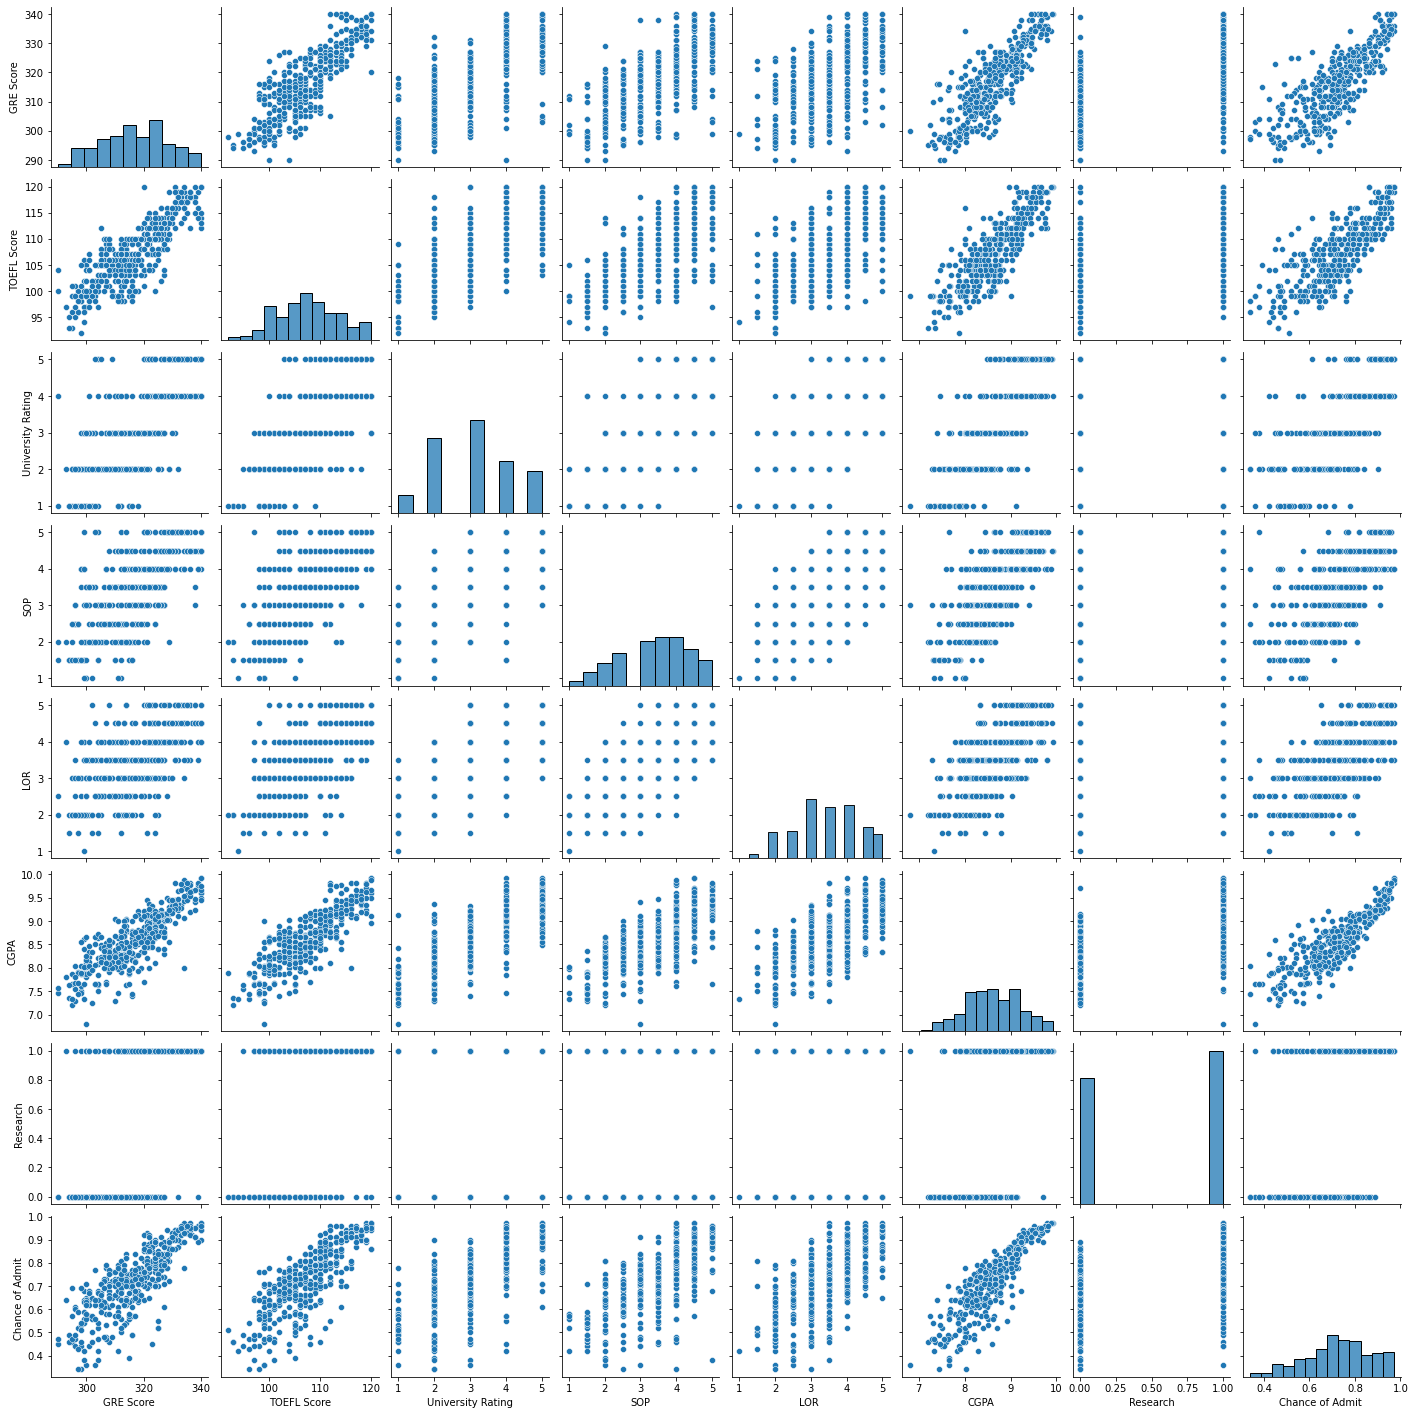

In [30]:
sns.pairplot(data=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']])

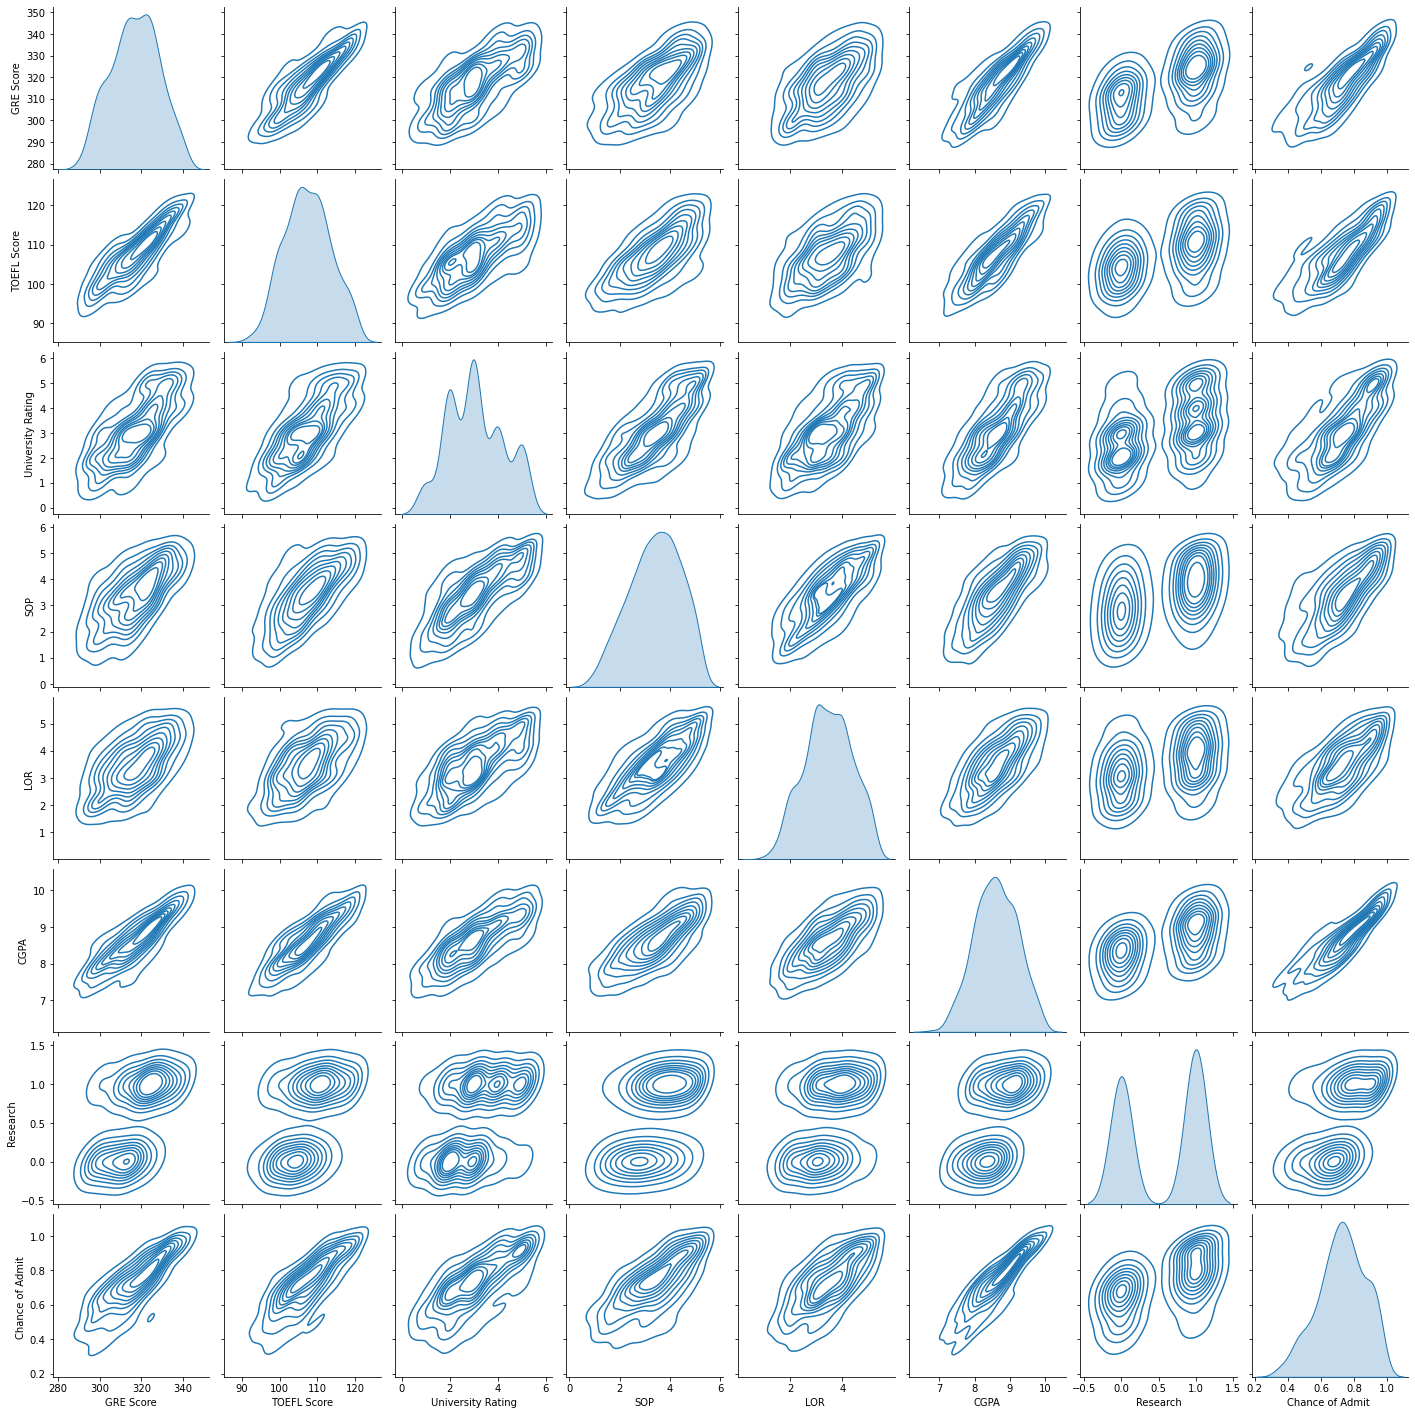

In [31]:
sns.pairplot(data=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']],kind='kde')

# Independent Variable

In [32]:
x=df.iloc[:,:7]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


# Dependent Variable

In [33]:
y=df.iloc[:,7:]
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [34]:
x.shape

(400, 7)

In [35]:
y.shape

(400, 1)

# Splitting The Data Into Train And Test

In [36]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
157,309,104,2,2.0,2.5,8.26,0
14,311,104,3,3.5,2.0,8.20,1
234,330,113,5,5.0,4.0,9.31,1
137,316,100,2,1.5,3.0,8.16,1
85,319,103,4,4.5,3.5,8.66,0
...,...,...,...,...,...,...,...
68,318,109,3,3.5,4.0,9.22,1
258,326,102,4,5.0,5.0,8.76,1
347,299,94,1,1.0,1.0,7.34,0
159,297,100,1,1.5,2.0,7.90,0


In [38]:
y_train

,Chance of Admit
157,0.65
14,0.61
234,0.91
137,0.71
85,0.76
...,...
68,0.68
258,0.77
347,0.42
159,0.52


In [39]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
299,305,112,3,3.0,3.5,8.65,0
308,312,108,3,3.5,3.0,8.53,0
161,298,99,1,1.5,3.0,7.46,0
24,336,119,5,4.0,3.5,9.80,1
326,299,100,3,2.0,2.0,8.02,0
...,...,...,...,...,...,...,...
58,300,99,1,3.0,2.0,6.80,1
23,334,119,5,5.0,4.5,9.70,1
388,296,97,2,1.5,2.0,7.80,0
51,312,100,2,1.5,3.5,7.90,1


In [40]:
y_test

,Chance of Admit
299,0.71
308,0.69
161,0.53
24,0.97
326,0.63
...,...
58,0.36
23,0.95
388,0.49
51,0.56


In [41]:
x_train.shape

(320, 7)

In [42]:
x_test.shape

(80, 7)

In [43]:
y_train.shape

(320, 1)

In [44]:
y_test.shape

(80, 1)

# Model Evaluation

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [46]:
model.score(x_test,y_test)

0.7406377024542445

In [47]:
y_predict=model.predict(x_test)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.05015571939256262
Mean Squared Error: 0.005790198452134604
Root Mean Squared Error: 0.07609335353455389


In [49]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [50]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)
lr = lore.fit(x_train, y_train)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
y_pred = lr.predict(x_test)

In [52]:
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True])

In [53]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score: %f' %(accuracy_score(y_test, y_pred) * 100))  
print('Recall Score: %f' %(recall_score(y_test, y_pred) * 100))  
print('ROC AUC Score: %f' %(roc_auc_score(y_test, y_pred) * 100))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 92.500000
Recall Score: 100.000000
ROC AUC Score: 62.500000
Confussion Matrix:
 [[ 2  6]
 [ 0 72]]


In [54]:
import pickle
pickle.dump(lr,open('university.pkl','wb'))
model=pickle.load(open('university.pkl','rb'))

In [55]:
model.predict([[323,108,3,3.5,3,8.6,0]])


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [56]:
!pip install ibm_watson_machine_learning

In [57]:
from ibm_watson_machine_learning import APIClient
import json
wml_credentials = {
    "apikey":"6fJrHdujsYQK3EvCJJAkXCylrXC2bAA8oyE3rkKRmkdh",
    "url":"https://us-south.ml.cloud.ibm.com"
}
client = APIClient(wml_credentials)
print(client)

In [58]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item["entity"]["name"]==space_name)['metadata']['id'])

In [59]:
space_uid= guid_from_space_name(client,'Univ')
print("Space UID = "+space_uid)

Space UID = d0338461-2b3e-4fc4-a04e-56343433acfc


In [60]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
d0338461-2b3e-4fc4-a04e-56343433acfc  Univ  2022-11-19T16:21:39.683Z
------------------------------------  ----  ------------------------


In [61]:
client.set.default_space(space_uid)

'SUCCESS'

In [62]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [63]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [65]:
model_details = client.repository.store_model(model=lore,meta_props = {
    client.repository.ModelMetaNames.NAME: 'model', 
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [66]:
model_id

'e9c24320-c674-4a4d-9227-8c2266829735'

In [76]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
299,305,112,3,3.0,3.5,8.65,0
308,312,108,3,3.5,3.0,8.53,0
161,298,99,1,1.5,3.0,7.46,0
24,336,119,5,4.0,3.5,9.80,1
326,299,100,3,2.0,2.0,8.02,0
...,...,...,...,...,...,...,...
58,300,99,1,3.0,2.0,6.80,1
23,334,119,5,5.0,4.5,9.70,1
388,296,97,2,1.5,2.0,7.80,0
51,312,100,2,1.5,3.5,7.90,1
